In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [264]:
training_df = pd.read_csv('training_data.csv', encoding='latin-1')
test_data = pd.read_csv('test_data.csv', encoding='latin-1')

p_outcome = ['None','Medium','Low','High''Very_High']

In [265]:
training_df

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,Porto,2019-02-23 09:00:00,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro,0.0,NaN
6808,Porto,2019-06-08 18:00:00,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,NaN,0.0,NaN
6809,Porto,2018-10-02 04:00:00,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro,0.0,NaN
6810,Porto,2019-01-30 01:00:00,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens,0.0,NaN


In [266]:
test_data

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Porto,2018-11-24 05:00:00,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,NaN,0.0,chuva fraca
1496,Porto,2019-03-01 02:00:00,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,NaN,0.0,NaN
1497,Porto,2018-09-05 01:00:00,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,NaN,0.0,NaN
1498,Porto,2018-11-05 08:00:00,46.0,83.2,83.2,LIGHT,10.0,1004.0,87.0,5.0,NaN,0.0,chuva moderada


In [267]:
training_df['city_name'].value_counts()

Porto    6812
Name: city_name, dtype: int64

In [268]:
training_df = training_df.drop(columns='city_name')
test_data = test_data.drop(columns='city_name')

In [269]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record_date              6812 non-null   object 
 1   AVERAGE_SPEED_DIFF       6812 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 3   AVERAGE_TIME_DIFF        6812 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 5   LUMINOSITY               6812 non-null   object 
 6   AVERAGE_TEMPERATURE      6812 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 8   AVERAGE_HUMIDITY         6812 non-null   float64
 9   AVERAGE_WIND_SPEED       6812 non-null   float64
 10  AVERAGE_CLOUDINESS       4130 non-null   object 
 11  AVERAGE_PRECIPITATION    6812 non-null   float64
 12  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(5)
memory usage: 692.0+ KB


In [270]:
training_df = training_df.drop_duplicates()

In [271]:
training_df['AVERAGE_HUMIDITY'].describe()

count    6812.000000
mean       80.084190
std        18.238863
min        14.000000
25%        69.750000
50%        83.000000
75%        93.000000
max       100.000000
Name: AVERAGE_HUMIDITY, dtype: float64

In [272]:
training_df['AVERAGE_TEMPERATURE'].describe()

count    6812.000000
mean       16.193482
std         5.163492
min         0.000000
25%        13.000000
50%        16.000000
75%        19.000000
max        35.000000
Name: AVERAGE_TEMPERATURE, dtype: float64

In [273]:
training_df['AVERAGE_TIME_DIFF'].describe()

count    6812.000000
mean       25.637111
std        33.510507
min         0.000000
25%         2.275000
50%        12.200000
75%        36.200000
max       296.500000
Name: AVERAGE_TIME_DIFF, dtype: float64

In [274]:
training_df.isna().sum()

record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

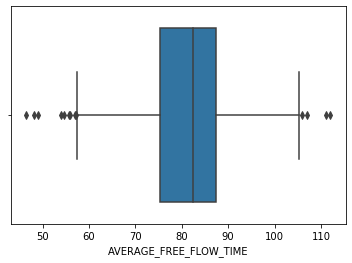

In [275]:
sns.boxplot(x=training_df['AVERAGE_FREE_FLOW_TIME'])

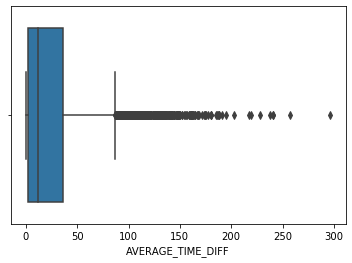

In [276]:
sns.boxplot(x=training_df['AVERAGE_TIME_DIFF'])

In [277]:
q = training_df['AVERAGE_TIME_DIFF'].quantile(0.91)
training_df = training_df[training_df['AVERAGE_TIME_DIFF'] < q]

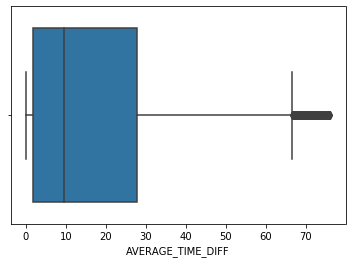

In [278]:
sns.boxplot(x=training_df['AVERAGE_TIME_DIFF'])

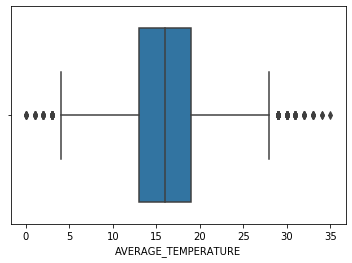

In [279]:
sns.boxplot(x=training_df['AVERAGE_TEMPERATURE'])

In [280]:
for x in ['AVERAGE_TEMPERATURE']:
    
  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit


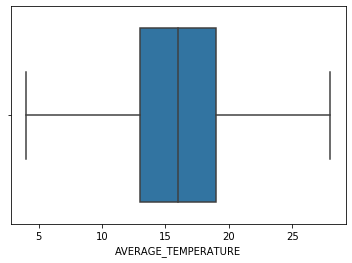

In [281]:
sns.boxplot(x=training_df['AVERAGE_TEMPERATURE'])

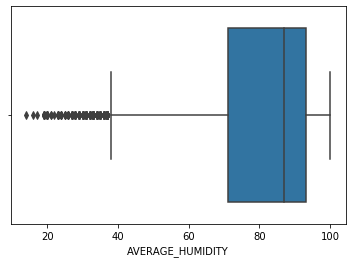

In [282]:
sns.boxplot(x=training_df['AVERAGE_HUMIDITY'])

In [283]:
for x in ['AVERAGE_HUMIDITY']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

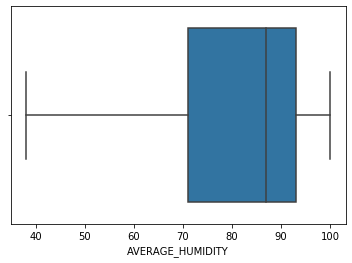

In [284]:
sns.boxplot(x=training_df['AVERAGE_HUMIDITY'])

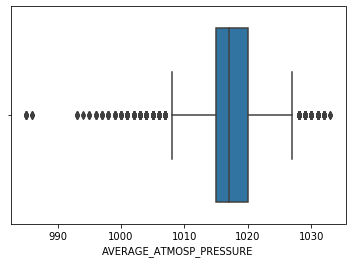

In [285]:
sns.boxplot(x=training_df['AVERAGE_ATMOSP_PRESSURE'])

In [286]:
for x in ['AVERAGE_ATMOSP_PRESSURE']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

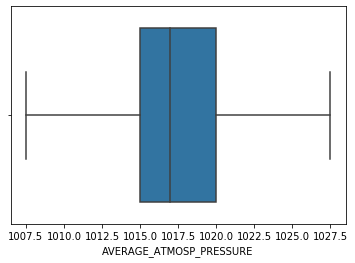

In [287]:
sns.boxplot(x=training_df['AVERAGE_ATMOSP_PRESSURE'])

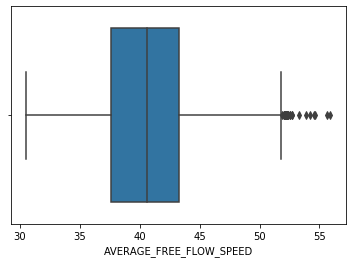

In [288]:
sns.boxplot(x=training_df['AVERAGE_FREE_FLOW_SPEED'])

In [289]:
for x in ['AVERAGE_FREE_FLOW_SPEED']:
    
  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit


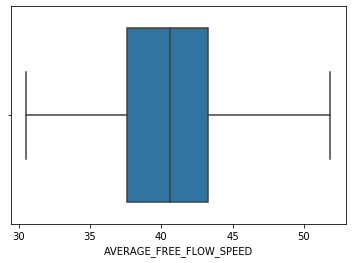

In [290]:
sns.boxplot(x=training_df['AVERAGE_FREE_FLOW_SPEED'])

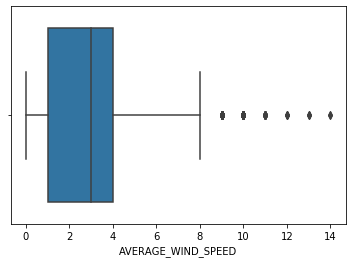

In [291]:
sns.boxplot(x=training_df['AVERAGE_WIND_SPEED'])

In [292]:
for x in ['AVERAGE_WIND_SPEED']:
    
  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit


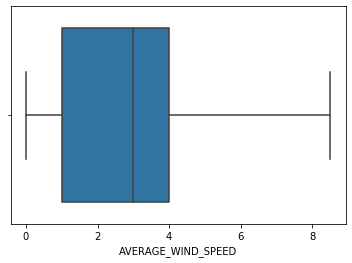

In [293]:
sns.boxplot(x=training_df['AVERAGE_WIND_SPEED'])

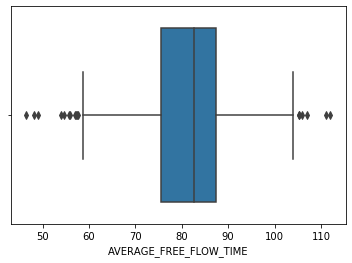

In [294]:
sns.boxplot(x=training_df['AVERAGE_FREE_FLOW_TIME'])

In [295]:
for x in ['AVERAGE_FREE_FLOW_TIME']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit


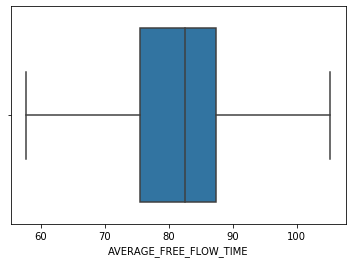

In [296]:
sns.boxplot(x=training_df['AVERAGE_FREE_FLOW_TIME'])

In [297]:
training_df.isna().sum()

record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2399
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               5686
dtype: int64

In [298]:
training_df['AVERAGE_TIME_DIFF'].describe()

count    6198.000000
mean       17.300210
std        19.392985
min         0.000000
25%         1.800000
50%         9.400000
75%        27.700000
max        76.100000
Name: AVERAGE_TIME_DIFF, dtype: float64

In [299]:
training_df['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1640
Low          1419
High          792
Very_High     147
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [300]:
training_df['AVERAGE_CLOUDINESS'].value_counts()

céu claro            1497
céu pouco nublado     443
nuvens quebrados      415
nuvens dispersas      415
algumas nuvens        393
nuvens quebradas      365
céu limpo             145
tempo nublado          66
nublado                60
Name: AVERAGE_CLOUDINESS, dtype: int64

In [301]:
training_df['AVERAGE_CLOUDINESS'].isna().value_counts()

False    3799
True     2399
Name: AVERAGE_CLOUDINESS, dtype: int64

In [302]:
training_df['AVERAGE_CLOUDINESS'].replace({"nuvens quebrados": "nuvens quebradas","tempo nublado":"nublado","céu claro":"céu limpo","nuvens dispersas":"algumas nuvens"}, inplace=True)
test_data['AVERAGE_CLOUDINESS'].replace({"nuvens quebrados": "nuvens quebradas","tempo nublado":"nublado","céu claro":"céu limpo"}, inplace=True)


In [303]:
training_df['AVERAGE_CLOUDINESS'].value_counts()

céu limpo            1642
algumas nuvens        808
nuvens quebradas      780
céu pouco nublado     443
nublado               126
Name: AVERAGE_CLOUDINESS, dtype: int64

In [304]:
training_df['AVERAGE_RAIN'].value_counts()

chuva fraca                    237
chuva moderada                 139
chuva leve                      44
aguaceiros fracos               33
chuva                           25
aguaceiros                      10
chuva forte                      8
trovoada com chuva leve          7
chuvisco fraco                   5
chuva de intensidade pesado      2
trovoada com chuva               1
chuvisco e chuva fraca           1
Name: AVERAGE_RAIN, dtype: int64

In [306]:
training_df['AVERAGE_RAIN'].value_counts()

chuva leve                 287
chuva moderada             164
aguaceiros fracos           33
aguaceiros                  10
chuva forte                 10
trovoada com chuva leve      7
trovoada com chuva           1
Name: AVERAGE_RAIN, dtype: int64

In [307]:
training_df['LUMINOSITY'].value_counts()

DARK         3206
LIGHT        2751
LOW_LIGHT     241
Name: LUMINOSITY, dtype: int64

In [308]:
training_df['AVERAGE_PRECIPITATION'].describe()

count    6198.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: AVERAGE_PRECIPITATION, dtype: float64

In [309]:
training_df.drop(columns='AVERAGE_PRECIPITATION',inplace=True)
test_data.drop(columns='AVERAGE_PRECIPITATION',inplace=True)

In [310]:
training_df['record_date'] = pd.to_datetime(training_df['record_date'], infer_datetime_format=True)
test_data['record_date'] = pd.to_datetime(test_data['record_date'], infer_datetime_format=True)
training_df['HOUR'] = training_df['record_date'].dt.hour 
test_data['HOUR'] = test_data['record_date'].dt.hour 
training_df.drop(columns='record_date', inplace=True)
test_data.drop(columns='record_date', inplace=True)

In [311]:
training_df.isna().sum()

AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2399
AVERAGE_RAIN               5686
HOUR                          0
dtype: int64

In [312]:
training_df = training_df.drop(columns='AVERAGE_RAIN')
test_data = test_data.drop(columns='AVERAGE_RAIN')

In [313]:
training_df.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,HOUR
0,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,7
1,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu limpo,14
2,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,16
3,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu limpo,11
4,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,8.5,NaN,12


In [314]:
one_hot_speed_diff = pd.get_dummies(training_df['AVERAGE_SPEED_DIFF'], prefix='AVERAGE_SPEED_DIFF')
training_df = pd.concat([training_df,one_hot_speed_diff],axis=1)
training_df = training_df.drop(columns='AVERAGE_SPEED_DIFF')

In [315]:
training_df['AVERAGE_CLOUDINESS'] = pd.Categorical(training_df.AVERAGE_CLOUDINESS)
test_data['AVERAGE_CLOUDINESS'] = pd.Categorical(test_data.AVERAGE_CLOUDINESS)

In [316]:
training_df['LUMINOSITY'] = pd.Categorical(training_df.LUMINOSITY)
test_data['LUMINOSITY'] = pd.Categorical(test_data.LUMINOSITY)

In [317]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
training_df['LUMINOSITY'] = le.fit_transform(training_df['LUMINOSITY'])
test_data['LUMINOSITY'] = le.fit_transform(test_data['LUMINOSITY'])
training_df['AVERAGE_CLOUDINESS'] = le.fit_transform(training_df['AVERAGE_CLOUDINESS'])
test_data['AVERAGE_CLOUDINESS'] = le.fit_transform(test_data['AVERAGE_CLOUDINESS'])

In [318]:
training_df['AVERAGE_CLOUDINESS'].value_counts()

5    2399
1    1642
0     808
4     780
2     443
3     126
Name: AVERAGE_CLOUDINESS, dtype: int64

In [319]:
param_grid = {'C' : [1,10,100,1000], 'gamma': [0.01,0.001,0.0001,0.00001], 'kernel': ['rbf', 'sigmoid']}
#gridR = GridSearchCV(SVC(random_state = 2021), param_grid, refit=True, verbose = 3)
svc = SVC(random_state = 2021, C=10, gamma=0.01)

X = training_df[['AVERAGE_TEMPERATURE','AVERAGE_CLOUDINESS','AVERAGE_HUMIDITY','AVERAGE_ATMOSP_PRESSURE']].copy()
Missing = X[X.AVERAGE_CLOUDINESS == 5]
X = X[ X.AVERAGE_CLOUDINESS != 5]
Y = X.pop('AVERAGE_CLOUDINESS')
#gridR.fit(X,Y)
svc.fit(X,Y)
predicted_Cloudiness = pd.Series(svc.predict(Missing[['AVERAGE_TEMPERATURE','AVERAGE_HUMIDITY','AVERAGE_ATMOSP_PRESSURE']]),index=Missing.index)
training_df.loc[Missing.index,'AVERAGE_CLOUDINESS'] = predicted_Cloudiness

In [320]:
training_df['AVERAGE_CLOUDINESS'].value_counts()

1    2631
4    1942
0     975
2     524
3     126
Name: AVERAGE_CLOUDINESS, dtype: int64

In [322]:
training_df.isna().sum()

AVERAGE_FREE_FLOW_SPEED         0
AVERAGE_TIME_DIFF               0
AVERAGE_FREE_FLOW_TIME          0
LUMINOSITY                      0
AVERAGE_TEMPERATURE             0
AVERAGE_ATMOSP_PRESSURE         0
AVERAGE_HUMIDITY                0
AVERAGE_WIND_SPEED              0
AVERAGE_CLOUDINESS              0
HOUR                            0
AVERAGE_SPEED_DIFF_High         0
AVERAGE_SPEED_DIFF_Low          0
AVERAGE_SPEED_DIFF_Medium       0
AVERAGE_SPEED_DIFF_None         0
AVERAGE_SPEED_DIFF_Very_High    0
dtype: int64

In [323]:
X = training_df.drop(['AVERAGE_SPEED_DIFF_High','AVERAGE_SPEED_DIFF_Low','AVERAGE_SPEED_DIFF_Medium','AVERAGE_SPEED_DIFF_None','AVERAGE_SPEED_DIFF_Very_High'], axis  = 1)
y = training_df[['AVERAGE_SPEED_DIFF_High','AVERAGE_SPEED_DIFF_Low','AVERAGE_SPEED_DIFF_Medium','AVERAGE_SPEED_DIFF_None','AVERAGE_SPEED_DIFF_Very_High']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6198 entries, 0 to 6811
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  6198 non-null   float64
 1   AVERAGE_TIME_DIFF        6198 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   6198 non-null   float64
 3   LUMINOSITY               6198 non-null   int64  
 4   AVERAGE_TEMPERATURE      6198 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  6198 non-null   float64
 6   AVERAGE_HUMIDITY         6198 non-null   float64
 7   AVERAGE_WIND_SPEED       6198 non-null   float64
 8   AVERAGE_CLOUDINESS       6198 non-null   int64  
 9   HOUR                     6198 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 692.6 KB


In [324]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2021)
y

,AVERAGE_SPEED_DIFF_High,AVERAGE_SPEED_DIFF_Low,AVERAGE_SPEED_DIFF_Medium,AVERAGE_SPEED_DIFF_None,AVERAGE_SPEED_DIFF_Very_High
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
6807,0,1,0,0,0
6808,0,0,1,0,0
6809,0,0,0,1,0
6810,0,0,0,1,0


In [325]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 4338
Length of Testing Data: 1860


In [326]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [328]:
def evaluate(model):
    model.fit(X,y)
    accuracy=model.score(X_test,y_test)
    
    print('model name ',model)
    print('accuracy ',accuracy)

In [329]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.2.0


In [330]:
X.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,HOUR
0,41.5,11.5,71.4,1,15.0,1019.0,100.0,3.0,4,7
1,41.7,48.3,87.4,1,21.0,1021.0,53.0,5.0,1,14
2,38.6,38.4,85.2,1,26.0,1014.0,61.0,4.0,1,16
3,37.4,61.0,94.1,1,18.0,1025.0,48.0,4.0,1,11
4,41.6,50.4,77.0,1,15.0,1008.0,82.0,8.5,4,12


In [331]:
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns = X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns = y.columns)


X.head()
X_scaled.head()
Y.head()
y_scaled.head()

,AVERAGE_SPEED_DIFF_High,AVERAGE_SPEED_DIFF_Low,AVERAGE_SPEED_DIFF_Medium,AVERAGE_SPEED_DIFF_None,AVERAGE_SPEED_DIFF_Very_High
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [332]:
def build_model(activation='relu', learning_rate=0.01):
    #Create a sequential model (with  three Layers - Last one is the output)
    model = Sequential()
    model.add(Dense(40, input_dim=X_scaled.shape[1], activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = [tf.keras.metrics.CategoricalAccuracy()]
    )
    return model


In [333]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=2021)

In [334]:
y_test.head()

,AVERAGE_SPEED_DIFF_High,AVERAGE_SPEED_DIFF_Low,AVERAGE_SPEED_DIFF_Medium,AVERAGE_SPEED_DIFF_None,AVERAGE_SPEED_DIFF_Very_High
53,0.0,0.0,0.0,1.0,0.0
5838,0.0,0.0,0.0,1.0,0.0
2205,0.0,0.0,1.0,0.0,0.0
5741,0.0,0.0,0.0,1.0,0.0
4588,0.0,1.0,0.0,0.0,0.0


In [335]:
TUNING_DICT = {
    'activation' : ['relu', 'sigmoid'],
    'learning_rate' : [0.01,0.001]
}

In [336]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=8, # how many epochs to wait before stopping
    restore_best_weights=True,
)
model = Sequential()


model.add(Dense(40, input_dim=X_scaled.shape[1], activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(5, activation='softmax'))

model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(0.01),
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
)

model.fit(X_train, y_train, validation_split=0.2,callbacks=[early_stopping], verbose=1, batch_size=32, epochs=40)


#kf = KFold(n_splits=5, shuffle=True, random_state=2021)

#model = KerasRegressor(build_fn=build_model, epochs=5, batch_size=32)
#grid_search = GridSearchCV(estimator = model,
#                           param_grid = TUNING_DICT,
#                           cv = kf,
#                           scoring = 'neg_mean_absolute_error',
#                           refit = 'True',
#                           verbose = 1)  
#grid_search.fit(X_train, y_train, validation_split=0.2, verbose=1)

Epoch 1/40
109/109 [==============================] - 1s 6ms/step - loss: 0.8917 - categorical_accuracy: 0.6138 - val_loss: 0.6266 - val_categorical_accuracy: 0.7247
Epoch 2/40
109/109 [==============================] - 0s 4ms/step - loss: 0.6100 - categorical_accuracy: 0.7389 - val_loss: 0.7347 - val_categorical_accuracy: 0.6613
Epoch 3/40
109/109 [==============================] - 1s 6ms/step - loss: 0.5982 - categorical_accuracy: 0.7441 - val_loss: 0.5970 - val_categorical_accuracy: 0.7408
Epoch 4/40
109/109 [==============================] - 1s 5ms/step - loss: 0.5874 - categorical_accuracy: 0.7418 - val_loss: 0.5853 - val_categorical_accuracy: 0.7339
Epoch 5/40
109/109 [==============================] - 1s 6ms/step - loss: 0.5673 - categorical_accuracy: 0.7622 - val_loss: 0.5770 - val_categorical_accuracy: 0.7327
Epoch 6/40
109/109 [==============================] - 1s 7ms/step - loss: 0.5541 - categorical_accuracy: 0.7617 - val_loss: 0.5728 - val_categorical_accuracy: 0.7488
Epoc

In [337]:
"""  #summarize results
 pint("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

model.summary() """

'  #summarize results\n pint("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))\nmeans = grid_search.cv_results_[\'mean_test_score\']\nstds = grid_search.cv_results_[\'std_test_score\']\nparams = grid_search.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param)) \n\nmodel.summary() '

In [338]:
#Our best model (remeber we set refit=True?)
#best_mlp_model = grid_search.best_estimator_

In [339]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

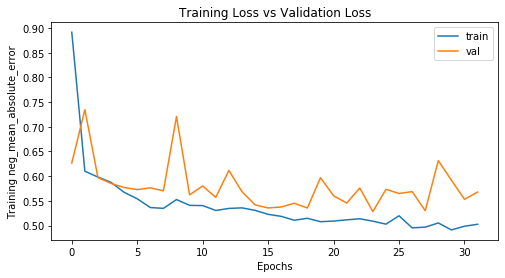

In [340]:
#Did the model overfit?
def plot_learning_curve(history, metric='neg_mean_absolte_error'):
    plt.figure(figsize=(8,4))
    plt.title('Training Loss vs Validation Loss')
    plt.plot(history.epoch, history.history['loss'], label='train')
    plt.plot(history.epoch, history.history['val_loss'], label='val')
    plt.ylabel('Training ' + metric)
    plt.xlabel('Epochs')
    plt.legend()

plot_learning_curve(model.history,metric='neg_mean_absolute_error')

In [341]:
classes = ['High','Low','Medium','None','Very_High']

In [342]:
#Obtain predictions
predictions = model.predict(X_test)
#predicted_classes = classes[np.argmax(predictions)]
predictions_classes = np.empty(predictions.size,dtype='object')
for i, prediction in enumerate(predictions):
    predictions_classes[i] = classes[np.argmax(prediction)]

y_test_classes = np.empty(y_test.size,dtype='object')
for i, val in enumerate(y_test.to_numpy()):
    y_test_classes[i] = classes[np.argmax(val)]
y_test_classes

#print(y_test.head())

pred_df = pd.DataFrame(predictions_classes)
count_right = 0
print(pred_df[0].value_counts())
for i in range(pred_df.size):
    if(predictions_classes[i] == y_test_classes[i]):
        count_right = count_right + 1

print("Got right" + str(count_right/pred_df.size))
print(predictions_classes[2])

None         694
Medium       438
Low          419
High         253
Very_High     56
Name: 0, dtype: int64
Got right0.9556989247311828
High


In [343]:
from sklearn import metrics
y_test

,AVERAGE_SPEED_DIFF_High,AVERAGE_SPEED_DIFF_Low,AVERAGE_SPEED_DIFF_Medium,AVERAGE_SPEED_DIFF_None,AVERAGE_SPEED_DIFF_Very_High
53,0.0,0.0,0.0,1.0,0.0
5838,0.0,0.0,0.0,1.0,0.0
2205,0.0,0.0,1.0,0.0,0.0
5741,0.0,0.0,0.0,1.0,0.0
4588,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
3966,0.0,1.0,0.0,0.0,0.0
1838,0.0,0.0,0.0,1.0,0.0
886,0.0,0.0,0.0,1.0,0.0
2236,1.0,0.0,0.0,0.0,0.0


In [344]:
acc = tf.keras.metrics.CategoricalAccuracy()

acc.update_state(y_test.to_numpy(),predictions)
acc.result().numpy()

0.7784946

In [345]:
predictions = (predictions > 0.5) 
cm = confusion_matrix(
    y_test.values.argmax(axis=1), predictions.argmax(axis=1))

In [346]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

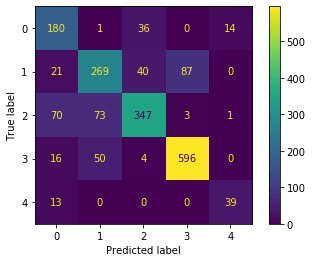

In [347]:
disp.plot()

In [348]:
""" f = open("output.csv","w")
f.write("RowId,Speed_Diff")

data_output = pd.DataFrame()
data_output.index += 1
data_output.loc[data_output[0] == 2, 0] = 'Medium'
data_output.loc[data_output[0] == 0, 0] = 'High'
data_output.loc[data_output[0] == 1, 0] = 'Low'
data_output.loc[data_output[0] == 3, 0] = 'None'
data_output.loc[data_output[0] == 4, 0] = 'Very_High'
data_output.to_csv("output.csv",header=["Speed_Diff"],index_label="RowId",) """

' f = open("output.csv","w")\nf.write("RowId,Speed_Diff")\n\ndata_output = pd.DataFrame()\ndata_output.index += 1\ndata_output.loc[data_output[0] == 2, 0] = \'Medium\'\ndata_output.loc[data_output[0] == 0, 0] = \'High\'\ndata_output.loc[data_output[0] == 1, 0] = \'Low\'\ndata_output.loc[data_output[0] == 3, 0] = \'None\'\ndata_output.loc[data_output[0] == 4, 0] = \'Very_High\'\ndata_output.to_csv("output.csv",header=["Speed_Diff"],index_label="RowId",) '